# 4 Common Machine Learning Data Transforms for Time Series Forecasting

by Jason Brownlee on August 28, 2019.[Here](https://machinelearningmastery.com/machine-learning-data-transforms-for-time-series-forecasting/) in [Deep Learning for Time Series](https://machinelearningmastery.com/category/deep-learning-time-series/)

Time series data often requires some preparation prior to being modeled with machine learning algorithms.

For example, differencing operations can be used to remove trend and seasonal structure from the sequence in order to simplify the prediction problem. Some algorithms, such as __neural networks__, `prefer data to be standardized and/or normalized prior to modeling`.

__Any transform operations applied to the series also require a similar inverse transform to be applied on the predictions__. This is required so that the resulting `calculated performance measures are in the same scale as the output variable` and can be compared to classical forecasting methods.

After reading this post:

- How to __transform__ and __inverse__ the transform for four methods in Python.
- Important considerations when using transforms on training and test datasets.
- The `suggested order for transforms` when multiple operations are required on a dataset.

## Overview
This tutorial is divided into three parts; they are:

- 1. Transforms for Time Series Data
    - 1.1 Power Transform
    - 1.2 Difference Transform
    - 1.3 Standardization
    - 1.4 Normalization
- 2. <p style="color:red;"><b>Considerations for Model Evaluation</b></p>
- 3. <p style="color:red;"><b>Order of Data Transforms`</b></p>

## 1. Transforms for Time Series Data

Given a __univariate time series dataset__, there are four transforms that are popular when using machine learning methods to model and make predictions.

They are:

- 1.1 Power Transform
- 1.2 Difference Transform
- 1.3 Standardization
- 1.4 Normalization

### 1.1 Power Transform
A __power transform__ `removes a shift from a data distribution` to make the distribution more-normal (Gaussian).

On a time series dataset, this can have the effect of `removing a change in variance over time`.

Popular examples are the __Log transform__ (`positive values`) or generalized versions such as the __Box-Cox transform__ (`positive values`) or the __Yeo-Johnson__ transform (`positive and negative values`).

#### Box-Cox transform

In [1]:
# example of power transform and inversion
from math import log
from math import exp
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# invert a boxcox transform for one value
def invert_boxcox(value, lam):
    # log case
    if lam == 0:
        return exp(value)
    # all other cases
    return exp(log(lam * value + 1) / lam)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


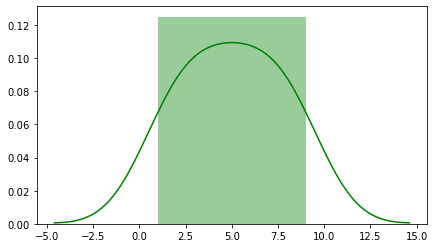

In [2]:
# define dataset
data = [x for x in range(1, 10)]
print(data)

# Data Distribution
plt.figure(figsize=(7, 4))
sns.distplot(data, color='g', hist_kws={'alpha': 0.4});

[0.         0.89887536 1.67448353 2.37952145 3.03633818 3.65711928
 4.2494518  4.81847233 5.36786648]
Lambda:0.7200338588580096


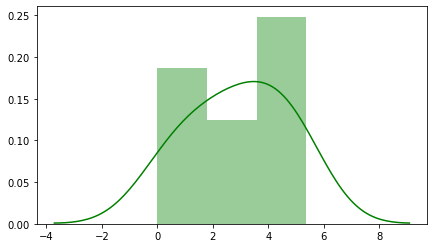

In [3]:
# power transform
transformed, lmbda = boxcox(data)
print(transformed)
print('Lambda:' + str(lmbda))

# Transformed Distribution
plt.figure(figsize=(7, 4))
sns.distplot(transformed, color='g', hist_kws={'alpha': 0.4});

[1.0, 2.0, 3.000000000000001, 4.0, 4.999999999999998, 6.000000000000001, 6.999999999999999, 7.999999999999998, 9.000000000000002]


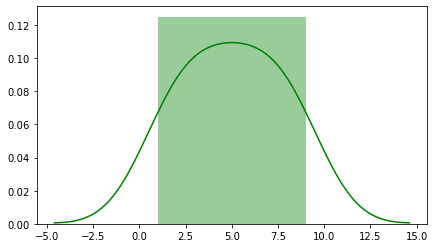

In [4]:
# invert transform
inverted = [invert_boxcox(x, lmbda) for x in transformed]
print(inverted)

# Inverted Distribution
plt.figure(figsize=(7, 4))
sns.distplot(inverted, color='g', hist_kws={'alpha': 0.4});

### 1.2 Difference Transform

A difference transform is a simple way for `removing a systematic structure` from the time series.

For example, a __trend__ can be `removed by subtracting the previous value from each value in the series`. This is `called first order differencing`. The process can be repeated (e.g. difference the differenced series) to remove second order trends, and so on.

A __seasonal__ structure can be `removed in a similar way by subtracting the observation from the prior season`, e.g. 12 time steps ago for monthly data with a yearly seasonal structure.


In [5]:
# example of a difference transform

# difference dataset
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

# invert difference
def invert_difference(orig_data, diff_data, interval):
    return [diff_data[i-interval] + orig_data[i-interval] for i in range(interval, len(orig_data))]

# define dataset
data = [x for x in range(1, 10)]
print(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# difference transform
transformed = difference(data, 1)
print(transformed)

[1, 1, 1, 1, 1, 1, 1, 1]


In [7]:
# invert difference
inverted = invert_difference(data, transformed, 1)
print(inverted)

[2, 3, 4, 5, 6, 7, 8, 9]


Note, the first “interval” values will be lost from the sequence after the transform. This is because they do not have a value at “interval” prior time steps, therefore cannot be differenced.

### 1.3 Standardization

Standardization is a transform for data with a Gaussian distribution.

It subtracts the mean and divides the result by the standard deviation of the data sample. This has the effect of transforming the data to have mean of zero, or centered, with a standard deviation of 1. This resulting distribution is __called a standard Gaussian distribution__, or a __standard normal__, hence the name of the transform.

[1, 2, 3, 4, 5, 6, 7, 8, 9]


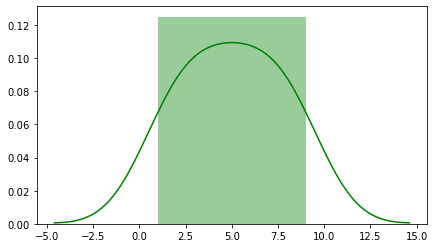

In [8]:
# example of standardization
from sklearn.preprocessing import StandardScaler
from numpy import array

# define dataset
data = [x for x in range(1, 10)]
print(data)

# Data Distribution
plt.figure(figsize=(7, 4))
sns.distplot(data, color='g', hist_kws={'alpha': 0.4});

In [9]:
data = array(data).reshape(len(data), 1)
print(data)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [10]:
# fit transform
transformer = StandardScaler()
transformer.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

[[-1.54919334]
 [-1.161895  ]
 [-0.77459667]
 [-0.38729833]
 [ 0.        ]
 [ 0.38729833]
 [ 0.77459667]
 [ 1.161895  ]
 [ 1.54919334]]


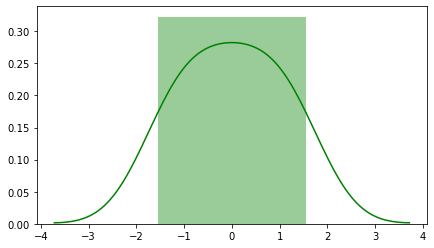

In [11]:
# difference transform
transformed = transformer.transform(data)
print(transformed)

# Transformed Distribution
plt.figure(figsize=(7, 4))
sns.distplot(transformed, color='g', hist_kws={'alpha': 0.4});

In [12]:
# invert difference
inverted = transformer.inverse_transform(transformed)
print(inverted)

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]


### 1.4 Normalization

Normalization is a `rescaling of data from the original range` to a `new range between 0 and 1`.

[1, 2, 3, 4, 5, 6, 7, 8, 9]


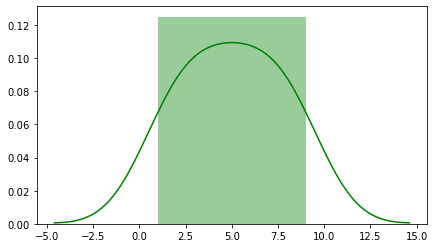

In [13]:
# example of normalization
from sklearn.preprocessing import MinMaxScaler
from numpy import array

# define dataset
data = [x for x in range(1, 10)]
print(data)

# Data Distribution
plt.figure(figsize=(7, 4))
sns.distplot(data, color='g', hist_kws={'alpha': 0.4});

In [14]:
data = array(data).reshape(len(data), 1)
print(data[0:5,])

[[1]
 [2]
 [3]
 [4]
 [5]]


[[0.   ]
 [0.125]
 [0.25 ]
 [0.375]
 [0.5  ]]


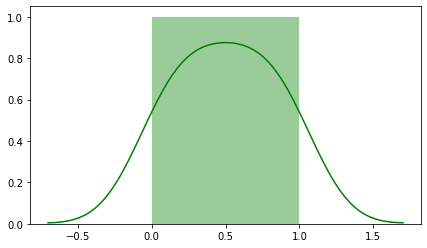

In [15]:
# fit transform
transformer = MinMaxScaler()
transformer.fit(data)

# difference transform
transformed = transformer.transform(data)
print(transformed[0:5,])

# Transformed Distribution
plt.figure(figsize=(7, 4))
sns.distplot(transformed, color='g', hist_kws={'alpha': 0.4});

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


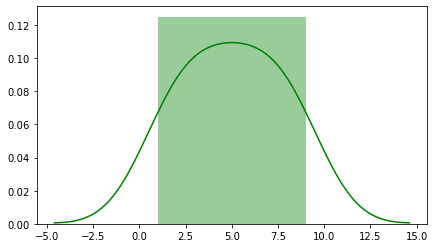

In [16]:
# invert difference
inverted = transformer.inverse_transform(transformed)
print(inverted[0:5,])

# Inverted Distribution
plt.figure(figsize=(7, 4))
sns.distplot(inverted, color='g', hist_kws={'alpha': 0.4});

## <p style="color:red;">2. Considerations for Model Evaluation</p>


We have mentioned the importance of being able to invert a transform on the predictions of a model in order to calculate a model performance statistic that is directly comparable to other methods.

Additionally, another concern is the problem of __data leakage__.

Three of the above data transforms estimate coefficients from a provided dataset that are then used to transform the data. Specifically:

- `Power Transform`: lambda parameter.
- `Standardization`: mean and standard deviation statistics.
- `Normalization`: min and max values.

__These coefficients must be estimated on the `training dataset only`__.

Once estimated, the __transform can be applied using the coefficients to the training and the test dataset before evaluating your model__.

If the __coefficients are estimated using the entire dataset prior to splitting into train and test sets, then `there is a small leakage of information from the test set to the training` dataset__. This can result in estimates of model skill that are `optimistically biased`.

Generally, __differencing transform__ `does not suffer the same problems`. In most cases, such as one-step forecasting, the lag observations are available to perform the difference calculation. If not, the lag predictions can be used wherever needed as a proxy for the true observations in difference calculations.

## <p style="color:red;">3. Order of Data Transforms</p>

You may `want to experiment with applying multiple data transforms` to a time series prior to modeling.

This is quite common, e.g. to apply a __power transform__ to `remove an increasing variance`, to apply __seasonal differencing__ to `remove seasonality`, and to apply __one-step differencing__ to `remove a trend`.

The __order that the transform operations__ are applied is important.

Intuitively, we can think through how the transforms may interact.

- __Power transforms__ should probably be performed `prior to differencing`.
- __Seasonal differencing__ should be performed `prior to one-step differencing`.
- __Standardization__ is linear and should be performed on the sample `after any nonlinear transforms and differencing`.
- __Normalization__ is a linear operation but it `should be the final transform` performed to maintain the preferred scale.

As such, a suggested ordering for data transforms is as follows:

- 1. Power Transform.
- 2. Seasonal Difference.
- 3. Trend Difference.
- 4. Standardization.
- 5. Normalization.

__Obviously, you would only use the transforms required for your specific dataset.__

$\color{red}{\text{Importantly}}$, when the transform __operations are inverted__, the order of the inverse transform operations must be reversed. Specifically, the `inverse operations must be performed in the following order`:

- 1. Normalization.
- 2. Standardization.
- 3. Trend Difference.
- 4. Seasonal Difference.
- 5. Power Transform.